# Разведывательный анализ данных (EDA)
### Итак, вспомним основные цели EDA:

* Сформулировать предположения и гипотезы для дальнейшего построения модели.
* Проверить качество данных и очистить их, если это необходимо.
* Определиться с параметрами модели.
* Последовательность проведения анализа зависит от задачи. EDA — это своего рода искусство!

## Начнем с азов: импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import seaborn as sns

%matplotlib inline
%pylab inline

pd.set_option('display.max_rows', 50) # show more lines 
pd.set_option('display.max_columns', 50) # show more columns

Populating the interactive namespace from numpy and matplotlib


In [2]:
students = pd.read_csv('stud_math.csv')
display(students.head(10))
students.info()
# Сопоставить количество колонок с списоком описания каждой колонки
len(students.columns)

school sex  age address famsize Pstatus  Medu  Fedu      Mjob     Fjob  \
0     GP   F   18       U     NaN       A   4.0   4.0   at_home  teacher   
1     GP   F   17       U     GT3     NaN   1.0   1.0   at_home    other   
2     GP   F   15       U     LE3       T   1.0   1.0   at_home    other   
3     GP   F   15       U     GT3       T   4.0   2.0    health      NaN   
4     GP   F   16       U     GT3       T   3.0   3.0     other    other   
5     GP   M   16       U     LE3       T   4.0   3.0  services    other   
6     GP   M   16     NaN     LE3       T   2.0   2.0     other    other   
7     GP   F   17       U     GT3       A   4.0   4.0     other  teacher   
8     GP   M   15       U     LE3       A   3.0   2.0  services    other   
9     GP   M   15       U     NaN     NaN   3.0   4.0     other    other   

       reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0      course   mother         2.0        2.0       0.0       yes     no   no   
1      course   father         1.0        2.0       0.0        no    yes   no   
2       other   mother         1.0        2.0       3.0       yes     no  NaN   
3        home   mother         1.0        3.0       0.0        no    yes  yes   
4        home   father         1.0        2.0       0.0        no    yes  yes   
5  reputation   mother         1.0        2.0       0.0        no    yes  yes   
6        home   mother         1.0        2.0       0.0        no     no   no   
7        home   mother         2.0        2.0       0.0       yes    yes   no   
8        home   mother         1.0        2.0       0.0        no    yes  yes   
9        home   mother         1.0        2.0       0.0        no    yes  yes   

  activities nursery  studytime, granular higher internet romantic  famrel  \
0         no     yes                 -6.0    yes      NaN       no     4.0   
1         no      no                 -6.0    yes      yes       no     5.0   
2         no     yes                 -6.0    yes      yes      NaN     4.0   
3        yes     yes                 -9.0    yes      yes      yes     3.0   
4         no     yes                 -6.0    yes       no       no     4.0   
5        yes     yes                 -6.0    yes      yes       no     5.0   
6         no     yes                 -6.0    yes      yes       no     4.0   
7         no     yes                 -6.0    yes       no       no     4.0   
8         no     yes                 -6.0    yes      yes       no     NaN   
9        yes     yes                 -6.0    yes      yes       no     5.0   

   freetime  goout  health  absences  score  
0       3.0    4.0     3.0       6.0   30.0  
1       3.0    3.0     3.0       4.0   30.0  
2       3.0    2.0     3.0      10.0   50.0  
3       2.0    2.0     5.0       2.0   75.0  
4       3.0    2.0     5.0       4.0   50.0  
5       4.0    2.0     5.0      10.0   75.0  
6       4.0    4.0     3.0       0.0   55.0  
7       1.0    4.0     1.0       6.0   30.0  
8       2.0    2.0     1.0       0.0   95.0  
9       5.0    1.0     5.0       0.0   75.0

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granul

30

In [5]:
# Functions for EDA

#First put headers and descriptions into dictionary to plot with corresponding titles 
# START
descr = '''school — аббревиатура школы, в которой учится ученик\n
sex — пол ученика ('F' - женский, 'M' - мужской)\n
age — возраст ученика (от 15 до 22)\n
address — тип адреса ученика ('U' - городской, 'R' - за городом)\n
famsize — размер семьи('LE3' <= 3, 'GT3' >3)\n
Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)\n
Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)\n
Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n
Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)\n
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)\n
guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)\n
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)\n
studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)\n
failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)\n
schoolsup — дополнительная образовательная поддержка (yes или no)\n
famsup — семейная образовательная поддержка (yes или no)\n
paid — дополнительные платные занятия по математике (yes или no)\n
activities — дополнительные внеучебные занятия (yes или no)\n
nursery — посещал детский сад (yes или no)\n
higher — хочет получить высшее образование (yes или no)\n
internet — наличие интернета дома (yes или no)\n
romantic — в романтических отношениях (yes или no)\n
famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)\n
freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)\n
goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)\n
health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)\n
absences — количество пропущенных занятий\n
score — баллы по госэкзамену по математике\n
granular — категориальный признак для studytime '''

dict_titles = {}
for row in descr.split('\n'):
    row = row.split(' — ')
    if len(row) > 1:
        header = row[0]
        title = row[1]
        dict_titles[header] = title
#FINISH


# Create func to plot features
def display_plot(column:str, data:pd.DataFrame = students, plot_type:str = "bar"):
    '''Display plot of column 

    Args:
     1. column : string
     2. data = students - default : DataFrame
     3. plot_type = "bar","boxplot","distplot" : string

    '''
    if plot_type == 'bar':
        graphic = data[column].value_counts().reset_index()
        graphic.plot(x = 'index',
                y = column,
                kind = 'bar',
                grid = True, 
                title =  dict_titles[column].capitalize())

    elif plot_type == 'boxplot':
        fig, ax = plt.subplots(figsize = (14, 4))
        sns.boxplot(x=column, y='score',
                    data=data.loc[data.loc[:, column].isin(data.loc[:, column].value_counts().index[:10])],
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + column +  ' \n '+ dict_titles[column].capitalize())
        plt.show()

    elif plot_type == 'distplot':
        sns.set()
        fig, ax = plt.subplots(figsize=[12, 4])
        sns.distplot(data[column], bins=10, label=dict_titles[column].capitalize())
        ax.legend(loc=1)
        plt.show()
    
    elif plot_type == 'heatmap':
        correlation = data[column].corr()
        fig, ax = plt.subplots(figsize=[12, 4])
        sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=.5, ax=ax)
        plt.show()
        
def iqr_test(data:pd.DataFrame = students, column: str) -> [int, int, int]:
    '''Calculate quantiles(0.25,0.75),IQR - (interquartile range)

        Formula:
        
        { q1 - 1.5*IQR },{ q3 + 1.5*IQR }

        Args:
        1. data = (default) students : DataFrame
        2. column : string
        
        Returns:
            list[quantile1, quantile3, iqr]
    '''
    q1 = data[column].quantile(q=0.25)
    q3 = data[column].quantile(q=0.75)

    # InterQuartile Range
    IQR = q3 - q1
    print('=========')
    print(f'Для колонки: {column}')
    print(f'25-% квартиль: {q1}')
    print(f'75-% квартиль: {q3}')
    print(f'IQR: {IQR}')
    print(f'Границы разборса: ({ q1 - 1.5*IQR },{ q3 + 1.5*IQR })')
    return [q1, q3, IQR]

def get_stat_dif(column: str, data: pd.DataFrame = students,target:str, alpha : float):
    cols = data.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(data.loc[data.loc[:, column] == comb[0], target], 
                        data.loc[data.loc[:, column] == comb[1], target], nan_policy='omit').pvalue \
            <= alpha/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)


SyntaxError: non-default argument follows default argument (&lt;ipython-input-5-12d2155c4368&gt;, line 86)

* 13 колонок с числовыми данными
* 17 колонок со строковыми значениями 
### Столбцы с пропущенными значениями 
* address, famsize, Pstatus, Medu, Fedu, Mjob, Fjob, reason, guardian, traveltime, studytime,     
failures, schoolsup,famsup,paid,activities, nursery, (studytime/ granular),higher, internet,romantic,famrel,freetime,goout,health,absences
* в Описании говорится о 29 колонках, но можно заметить, что в по существу колонок 30, лишней является 'studytime, granular' - заменим ее на granular - без описания


# Описание датасета
## Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик

2. sex — пол ученика ('F' - женский, 'M' - мужской)

3. age — возраст ученика (от 15 до 22)

4. address — тип адреса ученика ('U' - городской, 'R' - за городом)

5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15. failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16. schoolsup — дополнительная образовательная поддержка (yes или no)

17. famsup — семейная образовательная поддержка (yes или no)

18. paid — дополнительные платные занятия по математике (yes или no)

19. activities — дополнительные внеучебные занятия (yes или no)

20. nursery — посещал детский сад (yes или no)

21. higher — хочет получить высшее образование (yes или no)

22. internet — наличие интернета дома (yes или no)

23. romantic — в романтических отношениях (yes или no)

24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28. absences — количество пропущенных занятий

29. score — баллы по госэкзамену по математике


### Рассмотрим, какие данные хранятся в файле:

In [4]:
# Rename columns
students.columns = ['school', 'sex', 'age',
                'address', 'famsize', 'Pstatus',
                'Medu', 'Fedu', 'Mjob',
                'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid',
                'activities', 'nursery', 'granular',
                'higher', 'internet', 'romantic',
                'famrel', 'freetime', 'goout',
                'health', 'absences', 'score']
print(len(students.columns))

30


In [5]:
# describe numeric columns
students.describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  392.000000  371.000000  367.000000  388.000000  373.000000   
mean    16.696203    2.750000    2.614555    1.438692    2.038660    0.337802   
std      1.276043    1.098127    2.228732    0.694181    0.842078    0.743135   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000   40.000000    4.000000    4.000000    3.000000   

         granular      famrel    freetime       goout      health    absences  \
count  388.000000  368.000000  384.000000  387.000000  380.000000  383.000000   
mean    -6.115979    3.937500    3.231771    3.105943    3.531579    7.279373   
std      2.526235    0.927277    0.993940    1.115896    1.396019   23.465197   
min    -12.000000   -1.000000    1.000000    1.000000    1.000000    0.000000   
25%     -6.000000    4.000000    3.000000    2.000000    3.000000    0.000000   
50%     -6.000000    4.000000    3.000000    3.000000    4.000000    4.000000   
75%     -3.000000    5.000000    4.000000    4.000000    5.000000    8.000000   
max     -3.000000    5.000000    5.000000    5.000000    5.000000  385.000000   

            score  
count  389.000000  
mean    52.262211  
std     22.919022  
min      0.000000  
25%     40.000000  
50%     55.000000  
75%     70.000000  
max    100.000000

In [6]:
# desribe columns with string values
students.describe(include=['O'])

school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     395  395     378     368     350    376    359     378      364   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      349  208     295     261     314    133    197     137      250   

       schoolsup famsup paid activities nursery higher internet romantic  
count        386    356  355        381     379    375      361      364  
unique         2      2    2          2       2      2        2        2  
top           no    yes   no        yes     yes    yes      yes       no  
freq         335    219  200        195     300    356      305      240

In [7]:
students.describe(include='all').T

count unique     top freq      mean       std  min  25%  50%  75%  \
school       395      2      GP  349       NaN       NaN  NaN  NaN  NaN  NaN   
sex          395      2       F  208       NaN       NaN  NaN  NaN  NaN  NaN   
age          395    NaN     NaN  NaN   16.6962   1.27604   15   16   17   18   
address      378      2       U  295       NaN       NaN  NaN  NaN  NaN  NaN   
famsize      368      2     GT3  261       NaN       NaN  NaN  NaN  NaN  NaN   
Pstatus      350      2       T  314       NaN       NaN  NaN  NaN  NaN  NaN   
Medu         392    NaN     NaN  NaN      2.75   1.09813    0    2    3    4   
Fedu         371    NaN     NaN  NaN   2.61456   2.22873    0    2    2    3   
Mjob         376      5   other  133       NaN       NaN  NaN  NaN  NaN  NaN   
Fjob         359      5   other  197       NaN       NaN  NaN  NaN  NaN  NaN   
reason       378      4  course  137       NaN       NaN  NaN  NaN  NaN  NaN   
guardian     364      3  mother  250       NaN       NaN  NaN  NaN  NaN  NaN   
traveltime   367    NaN     NaN  NaN   1.43869  0.694181    1    1    1    2   
studytime    388    NaN     NaN  NaN   2.03866  0.842078    1    1    2    2   
failures     373    NaN     NaN  NaN  0.337802  0.743135    0    0    0    0   
schoolsup    386      2      no  335       NaN       NaN  NaN  NaN  NaN  NaN   
famsup       356      2     yes  219       NaN       NaN  NaN  NaN  NaN  NaN   
paid         355      2      no  200       NaN       NaN  NaN  NaN  NaN  NaN   
activities   381      2     yes  195       NaN       NaN  NaN  NaN  NaN  NaN   
nursery      379      2     yes  300       NaN       NaN  NaN  NaN  NaN  NaN   
granular     388    NaN     NaN  NaN  -6.11598   2.52623  -12   -6   -6   -3   
higher       375      2     yes  356       NaN       NaN  NaN  NaN  NaN  NaN   
internet     361      2     yes  305       NaN       NaN  NaN  NaN  NaN  NaN   
romantic     364      2      no  240       NaN       NaN  NaN  NaN  NaN  NaN   
famrel       368    NaN     NaN  NaN    3.9375  0.927277   -1    4    4    5   
freetime     384    NaN     NaN  NaN   3.23177   0.99394    1    3    3    4   
goout        387    NaN     NaN  NaN   3.10594    1.1159    1    2    3    4   
health       380    NaN     NaN  NaN   3.53158   1.39602    1    3    4    5   
absences     383    NaN     NaN  NaN   7.27937   23.4652    0    0    4    8   
score        389    NaN     NaN  NaN   52.2622    22.919    0   40   55   70   

            max  
school      NaN  
sex         NaN  
age          22  
address     NaN  
famsize     NaN  
Pstatus     NaN  
Medu          4  
Fedu         40  
Mjob        NaN  
Fjob        NaN  
reason      NaN  
guardian    NaN  
traveltime    4  
studytime     4  
failures      3  
schoolsup   NaN  
famsup      NaN  
paid        NaN  
activities  NaN  
nursery     NaN  
granular     -3  
higher      NaN  
internet    NaN  
romantic    NaN  
famrel        5  
freetime      5  
goout         5  
health        5  
absences    385  
score       100

## Признаки имеют следующие типы:
* номинативные признаки: school, sex, address, famsize, Pstatus, Mjob, Fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic;
* количественные: age, absences, score
* ранговые: Medu, Fedu, traveltime, studytime, famrel, freetime, goout, healthy
* отдельно можно посмотреть признак absences

In [33]:
# group columns
all_columns = ['school', 'sex', 'age',
                'address', 'famsize', 'Pstatus',
                'Medu', 'Fedu', 'Mjob',
                'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 'failures',
                'schoolsup', 'famsup', 'paid',
                'activities', 'nursery', 'granular',
                'higher', 'internet', 'romantic',
                'famrel', 'freetime', 'goout',
                'health', 'absences', 'score']

num_columns = ['age', 'failures', 'absences', 'score']

categ_columns = ['school', 'sex', 
                'address', 'famsize', 'Pstatus',
                'Medu', 'Fedu', 'Mjob',
                'Fjob', 'reason', 'guardian',
                'traveltime', 'studytime', 
                'schoolsup', 'famsup', 'paid',
                'activities', 'nursery', 'granular',
                'higher', 'internet', 'romantic',
                'famrel', 'freetime', 'goout',
                'health']

## Проверим дубликаты и пропущенные значения

In [8]:
# Check for duplicates
print("Duplicates: ",len(students[students.duplicated(keep=False) == True]))


Duplicates:  0


In [9]:
# Sum missed values
print("Have NULL values:\n",students.isnull().sum())

Have NULL values:
 school         0
sex            0
age            0
address       17
famsize       27
Pstatus       45
Medu           3
Fedu          24
Mjob          19
Fjob          36
reason        17
guardian      31
traveltime    28
studytime      7
failures      22
schoolsup      9
famsup        39
paid          40
activities    14
nursery       16
granular       7
higher        20
internet      34
romantic      31
famrel        27
freetime      11
goout          8
health        15
absences      12
score          6
dtype: int64


In [10]:
#Lost data relative to all data
lost = students.isnull().sum().sum()*100 / (len(students)*30)
print (f'{round(lost,2)}%' + ' lost data')

4.77% lost data


# Рекомендации по выполнению проекта
1. Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
3. Посмотрите на распределение признака для числовых переменных, устраните выбросы.
4. Оцените количество уникальных значений для номинативных переменных.
5. По необходимости преобразуйте данные
6. Проведите корреляционный анализ количественных переменных
7. Отберите не коррелирующие переменные.
8. Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

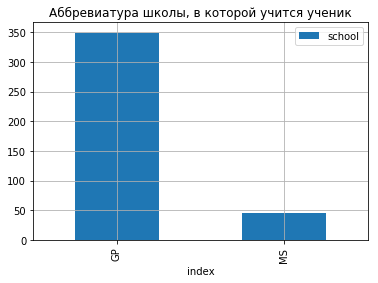

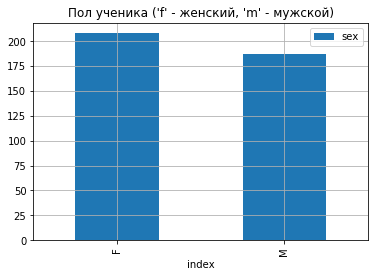

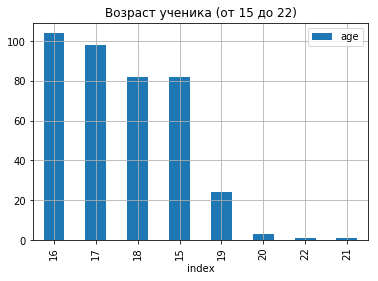

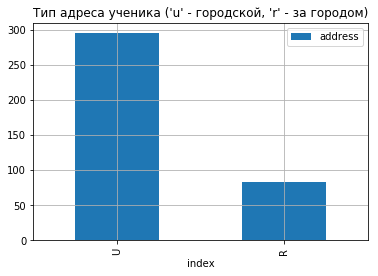

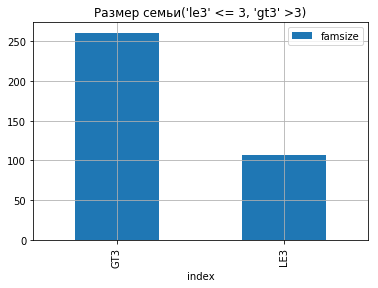

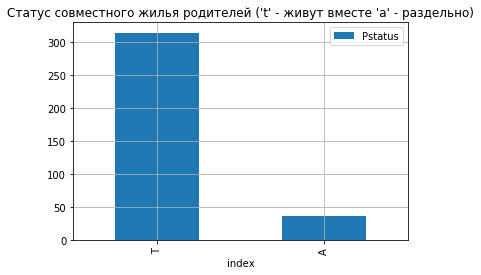

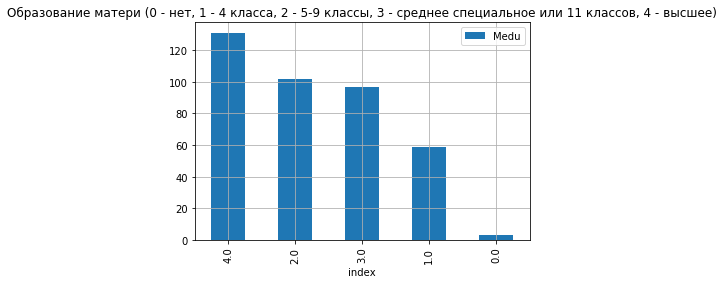

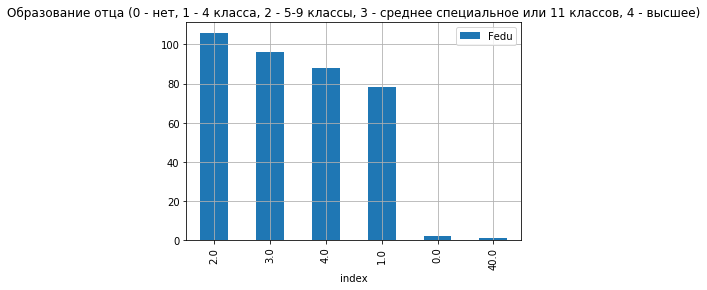

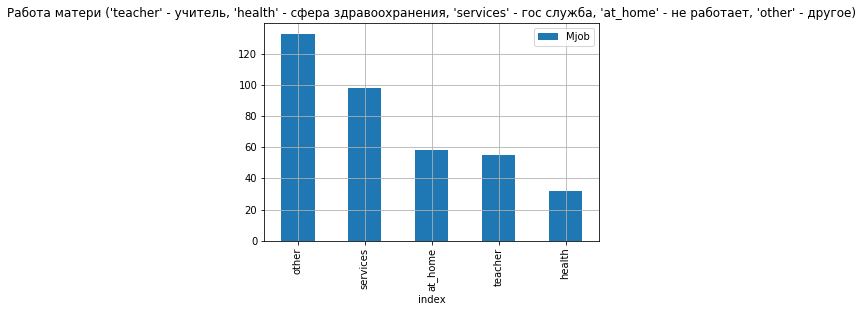

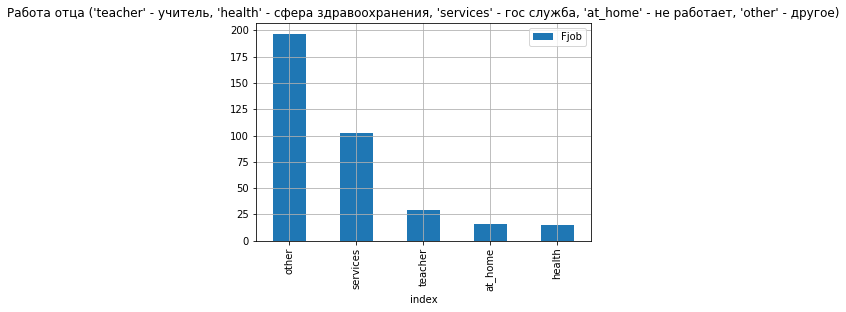

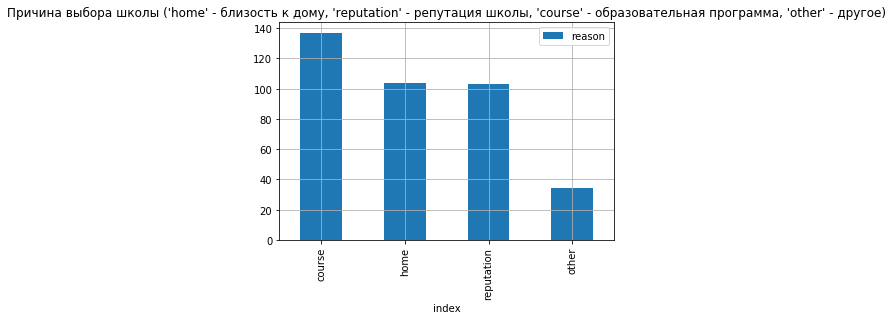

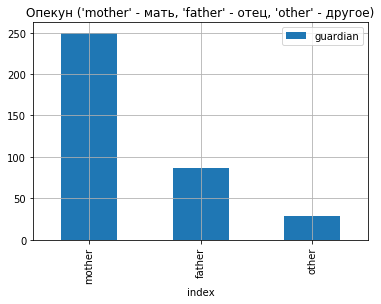

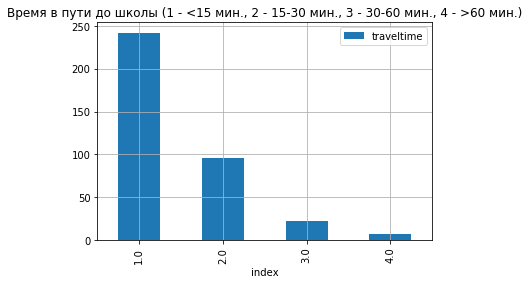

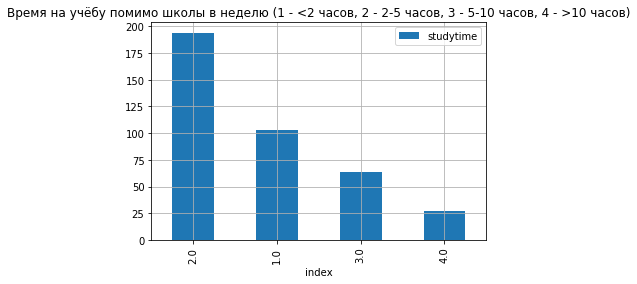

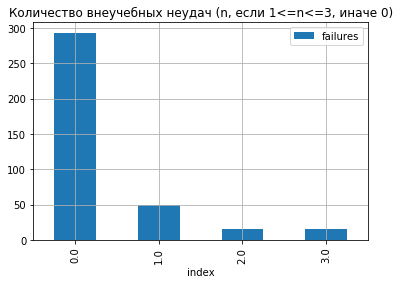

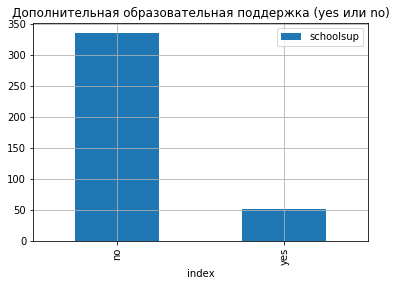

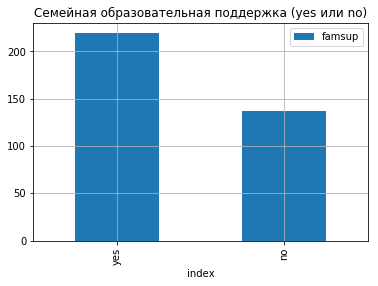

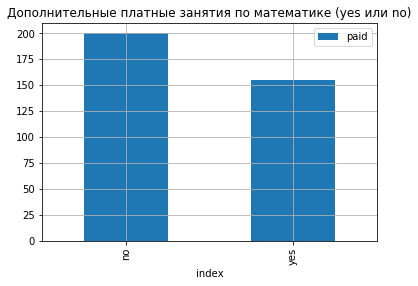

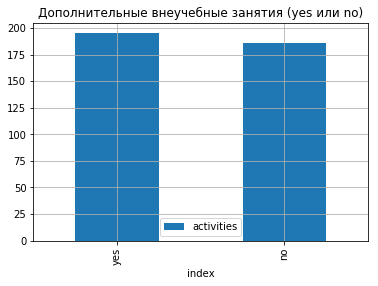

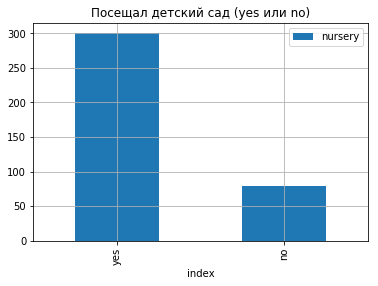

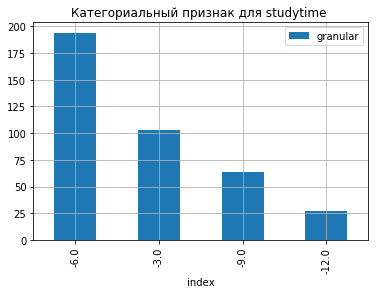

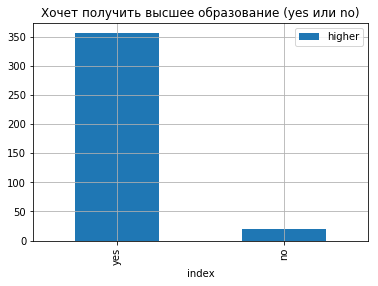

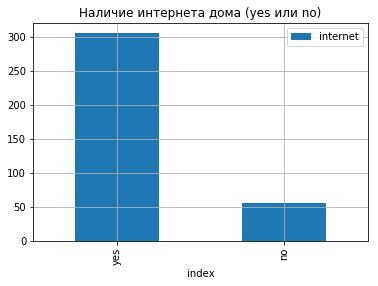

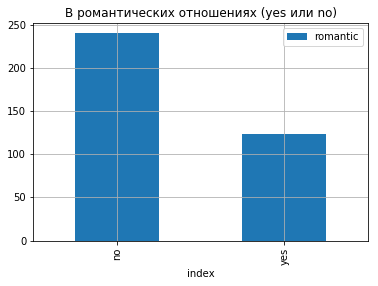

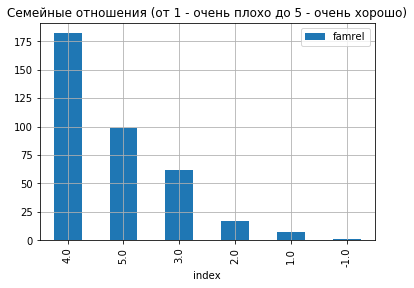

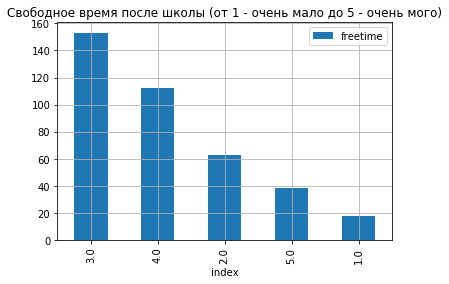

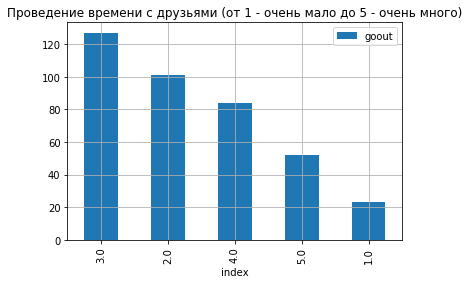

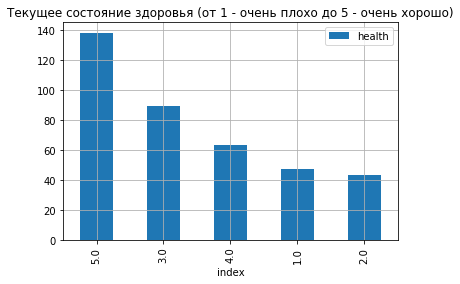

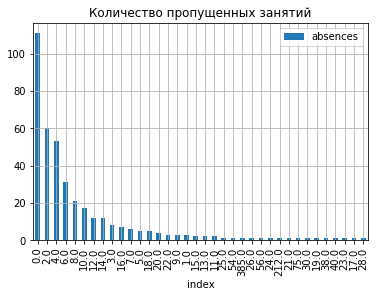

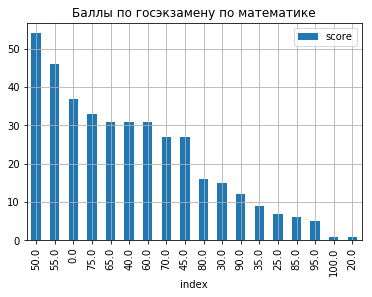

In [11]:

for column in students.columns:
    display_plot(column)


* Убрать пропуски
* Проанализировать Fedu, Medu
* Убрать неинформативный признак granular
* Убрать выброс в famrel
* Проверить влияет ли дет-сад на балл в школе, при этом образование родителей
* Проверить влияние пропусков на балл
* Преобразовать в числа
* Понять положение школ, если до школы < 15 мин и ученик из загорода
* Влияние занятия вне школы на балл
* Разбить на шкалы признак absences
* Разбить на шкалы признак failures

## Выводы:
* Выбросы в Fedu, famrel
* Убрать неиформативный признак granular
* Признак failures сгруппировать с двумя значениями: 1 для значения > 0, 0 в остальных

In [12]:


#Fedu change value 40 to 4
students.loc[students.Fedu == 40, 'Fedu'] = 4

# replace mistaken value
students.loc[students.famrel == -1, 'famrel'] = 1

# change feature called failures
students.loc[students.failures > 0, 'failures'] = 1

# Drop non-informative feature
students = students.drop('granular',axis=1)


## Score - Финальная оценка по экзамену
### Распишем традиционную систему оценок для 100-бальной системы

* 80-100 Отлично/Зачтено "A+" или "A"
* 60-79 Хорошо/Зачтено "B" или "C"
* 40-59 Удовлетворительно/Зачтено "D" или "E"
* 0-39 Неудовлетворительно/ Не Зачтено "Fx" или "F"

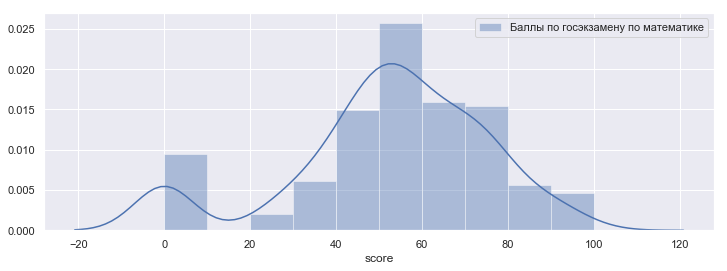

In [13]:
display_plot(column='score', data=students, plot_type='distplot')

In [30]:
students.score.value_counts(dropna=False)

50     53
55     42
75     31
65     30
60     29
70     27
40     25
45     23
80     16
30     14
90      9
35      9
25      7
52      5
95      5
85      3
100     1
Name: score, dtype: int64

### Значения Nan для столбца score заменим на среднее

In [29]:
students.score = students.score.fillna(students.score.mean())
students.score = students.score.apply(lambda x: round(x))

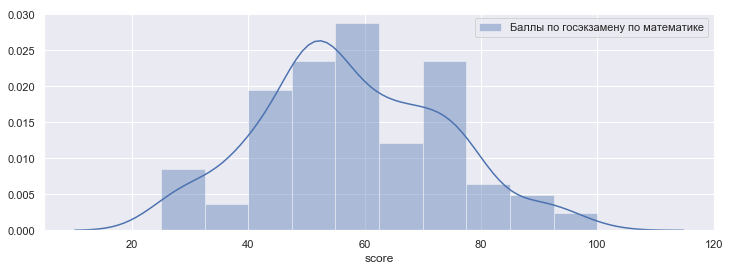

In [31]:
display_plot(column='score', data=students, plot_type='distplot')

In [18]:
corr_table = round(students.corr() * 100)
for column in corr_table.columns:
    corr_table.loc[corr_table[column] == corr_table[column].max(),column] = 0

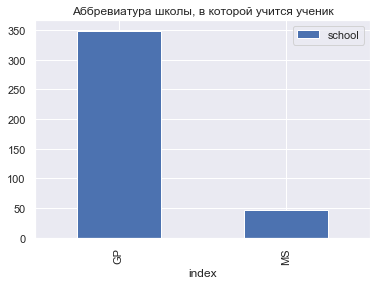

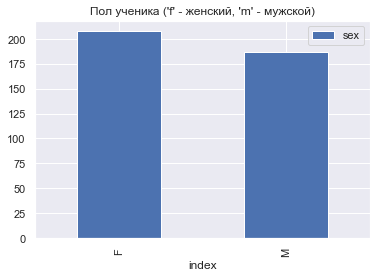

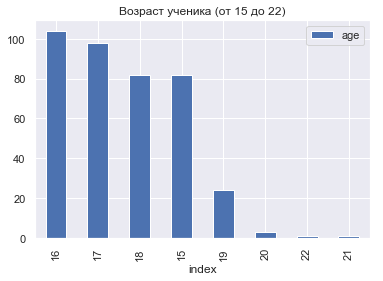

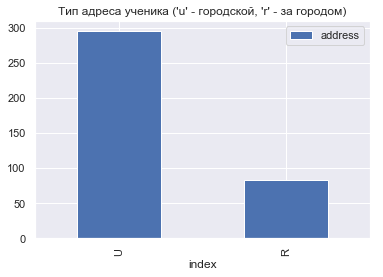

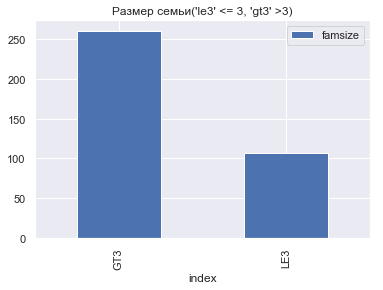

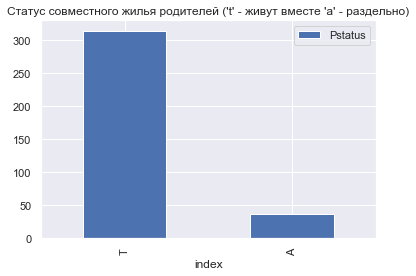

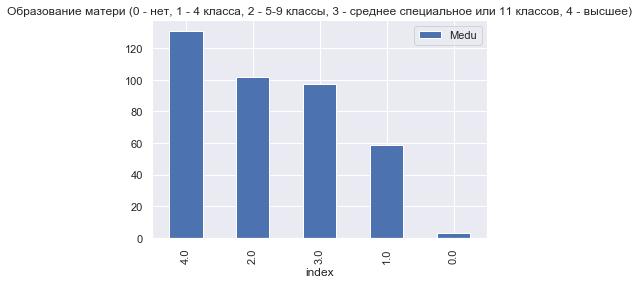

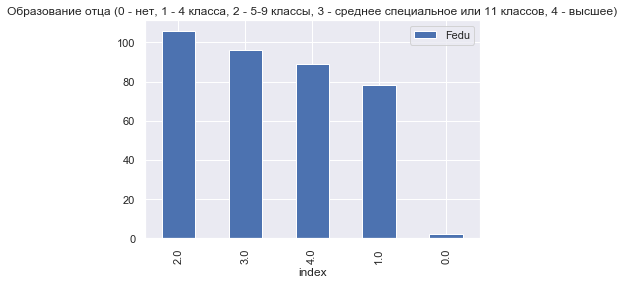

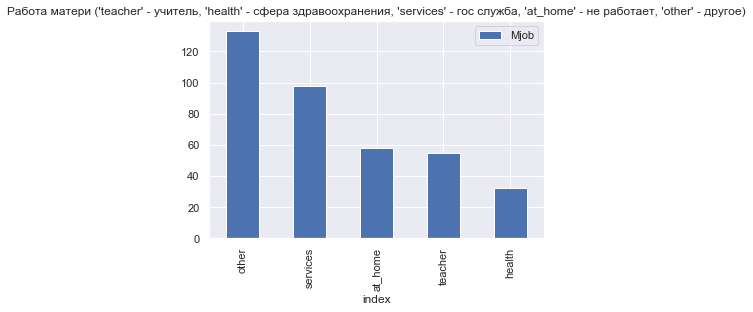

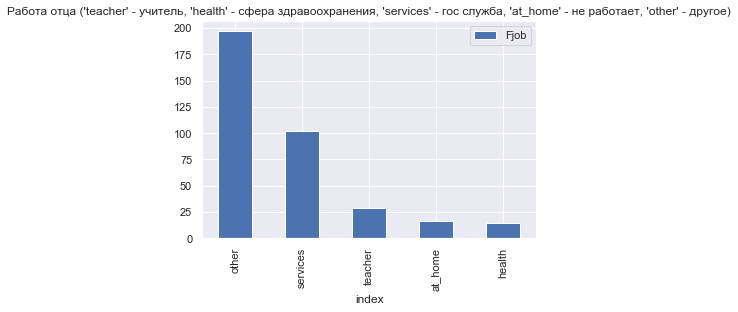

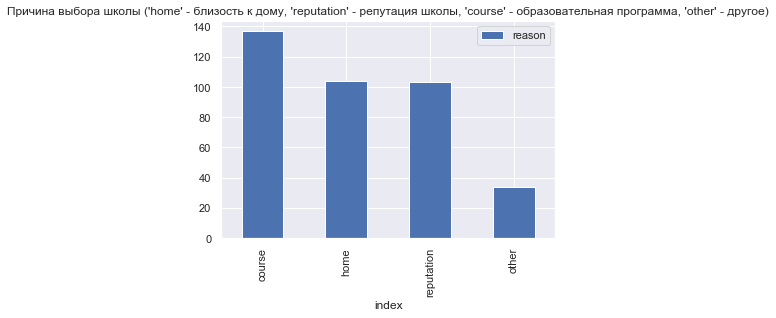

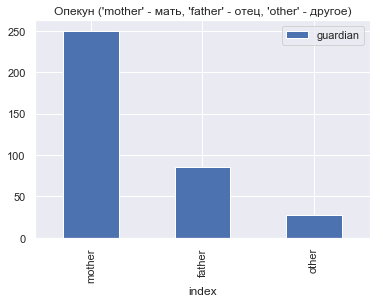

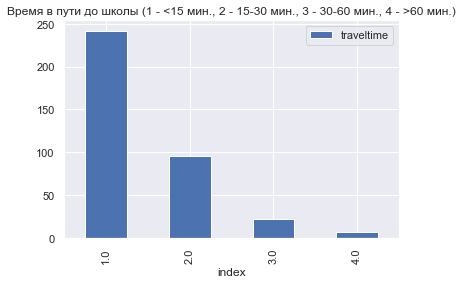

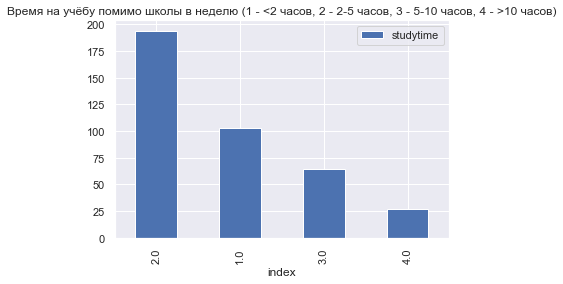

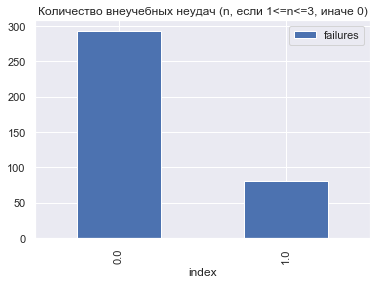

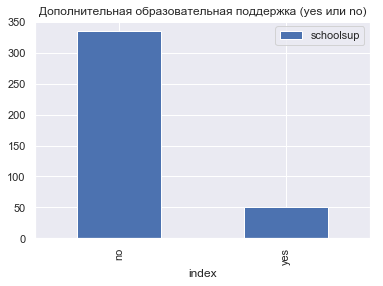

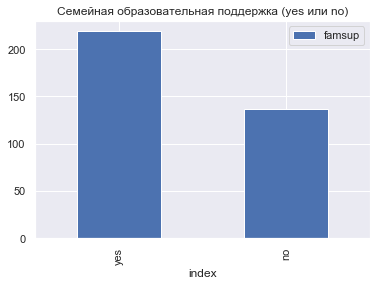

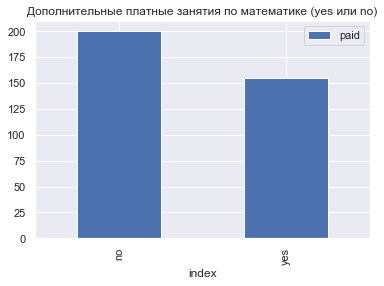

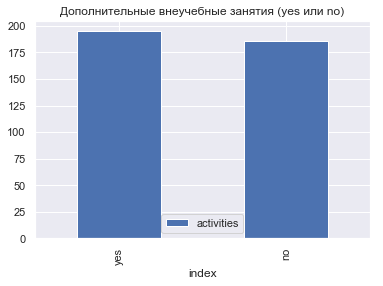

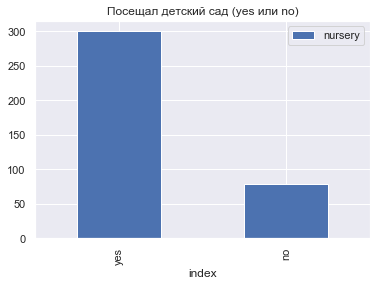

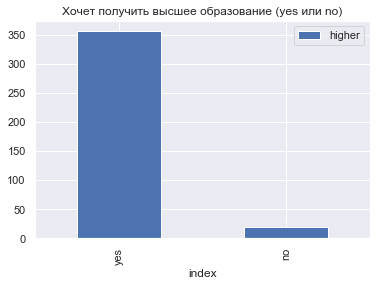

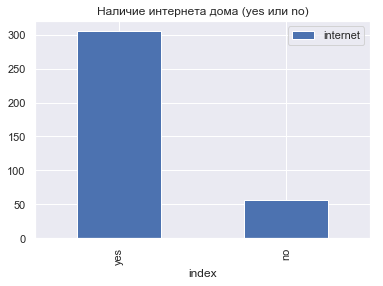

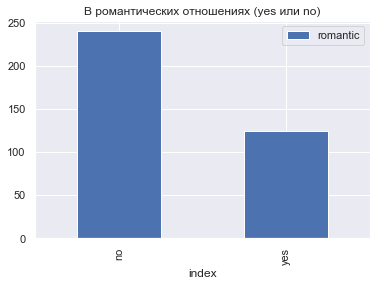

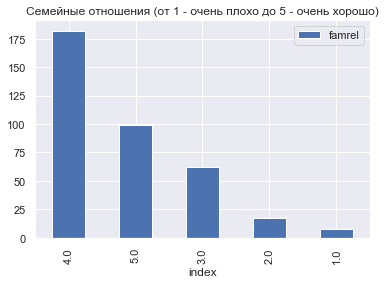

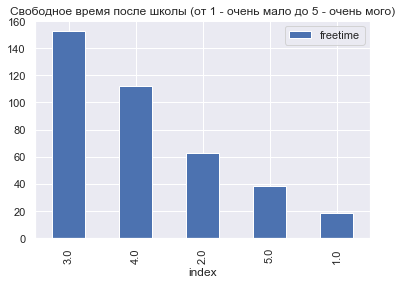

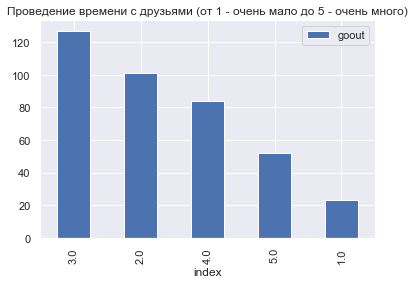

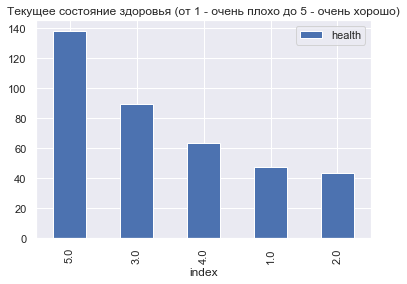

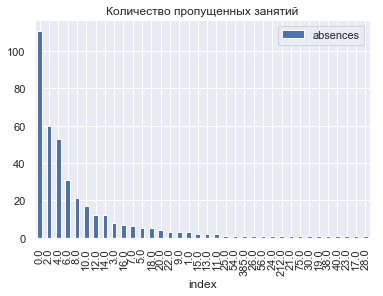

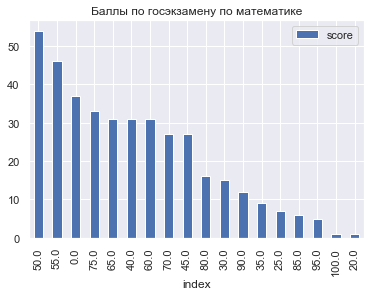

In [19]:
#Plot again to see the changes
for column in students.columns:
    display_plot(column)

In [36]:
# cut off outliers for values age, absences, score
for column in ['age','absences', 'score']:
    
    q1,q3,IQR = iqr_test(students, column)
    # remove outliers:
    students = students[(students[column] >= q1 - 1.5*IQR) & (students[column] <= q3 + 1.5*IQR)]


NameError: name &#39;iqr_test&#39; is not defined

In [21]:
# convert nominative features to numeric
dict_nominative = {}

for column in students.describe(include=['O']):
    
    # filling the dictionary data by column
    dict_column = {}
    count = 0

    for value in students[column].unique(): 
        if type(value) != float:
            dict_column[value] = count
            count += 1

    dict_nominative[column] = dict_column

    students[column] = students[column].apply(lambda x: dict_column[x] if type(x) != float else None)


In [22]:
print(dict_nominative)
students.describe()

{&#39;school&#39;: {&#39;GP&#39;: 0, &#39;MS&#39;: 1}, &#39;sex&#39;: {&#39;F&#39;: 0, &#39;M&#39;: 1}, &#39;address&#39;: {&#39;U&#39;: 0, &#39;R&#39;: 1}, &#39;famsize&#39;: {&#39;GT3&#39;: 0, &#39;LE3&#39;: 1}, &#39;Pstatus&#39;: {&#39;A&#39;: 0, &#39;T&#39;: 1}, &#39;Mjob&#39;: {&#39;at_home&#39;: 0, &#39;health&#39;: 1, &#39;other&#39;: 2, &#39;services&#39;: 3, &#39;teacher&#39;: 4}, &#39;Fjob&#39;: {&#39;teacher&#39;: 0, &#39;other&#39;: 1, &#39;health&#39;: 2, &#39;services&#39;: 3, &#39;at_home&#39;: 4}, &#39;reason&#39;: {&#39;course&#39;: 0, &#39;other&#39;: 1, &#39;home&#39;: 2, &#39;reputation&#39;: 3}, &#39;guardian&#39;: {&#39;mother&#39;: 0, &#39;father&#39;: 1, &#39;other&#39;: 2}, &#39;schoolsup&#39;: {&#39;yes&#39;: 0, &#39;no&#39;: 1}, &#39;famsup&#39;: {&#39;no&#39;: 0, &#39;yes&#39;: 1}, &#39;paid&#39;: {&#39;no&#39;: 0, &#39;yes&#39;: 1}, &#39;activities&#39;: {&#39;no&#39;: 0, &#39;yes&#39;: 1}, &#39;nursery&#39;: {&#39;yes&#39;: 0, &#39;no&#39;: 1}, &#39;higher

school         sex         age     address     famsize     Pstatus  \
count  329.000000  329.000000  329.000000  315.000000  310.000000  295.000000   
mean     0.121581    0.486322   16.598784    0.215873    0.300000    0.898305   
std      0.327299    0.500574    1.223549    0.412081    0.458998    0.302760   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    0.000000    0.000000    1.000000   
50%      0.000000    0.000000   16.000000    0.000000    0.000000    1.000000   
75%      0.000000    1.000000   18.000000    0.000000    1.000000    1.000000   
max      1.000000    1.000000   21.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob      reason    guardian  \
count  327.000000  309.000000  315.000000  299.000000  314.000000  301.000000   
mean     2.776758    2.501618    2.168254    1.655518    1.458599    0.382060   
std      1.108671    1.088978    1.231335    1.095320    1.240892    0.608449   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.000000    2.000000    2.000000    1.000000    0.000000    0.000000   
50%      3.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%      4.000000    3.000000    3.000000    3.000000    3.000000    1.000000   
max      4.000000    4.000000    4.000000    4.000000    3.000000    2.000000   

       traveltime   studytime    failures   schoolsup      famsup        paid  \
count  306.000000  324.000000  312.000000  320.000000  296.000000  294.000000   
mean     1.441176    2.061728    0.166667    0.856250    0.621622    0.448980   
std      0.709285    0.848903    0.373277    0.351386    0.485804    0.498238   
min      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
50%      1.000000    2.000000    0.000000    1.000000    1.000000    0.000000   
75%      2.000000    2.000000    0.000000    1.000000    1.000000    1.000000   
max      4.000000    4.000000    1.000000    1.000000    1.000000    1.000000   

       activities     nursery      higher    internet    romantic      famrel  \
count  317.000000  316.000000  312.000000  302.000000  301.000000  306.000000   
mean     0.517350    0.199367    0.032051    0.162252    0.305648    3.960784   
std      0.500489    0.400158    0.176419    0.369293    0.461448    0.904505   
min      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    4.000000   
50%      1.000000    0.000000    0.000000    0.000000    0.000000    4.000000   
75%      1.000000    0.000000    0.000000    0.000000    1.000000    5.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    5.000000   

         freetime       goout      health    absences       score  
count  321.000000  322.000000  316.000000  329.000000  329.000000  
mean     3.267913    3.080745    3.550633    5.072948   57.724350  
std      0.992093    1.079259    1.387232    4.949208   15.757849  
min      1.000000    1.000000    1.000000    0.000000   25.000000  
25%      3.000000    2.000000    3.000000    2.000000   50.000000  
50%      3.000000    3.000000    4.000000    4.000000   55.000000  
75%      4.000000    4.000000    5.000000    8.000000   70.000000  
max      5.000000    5.000000    5.000000   20.000000  100.000000

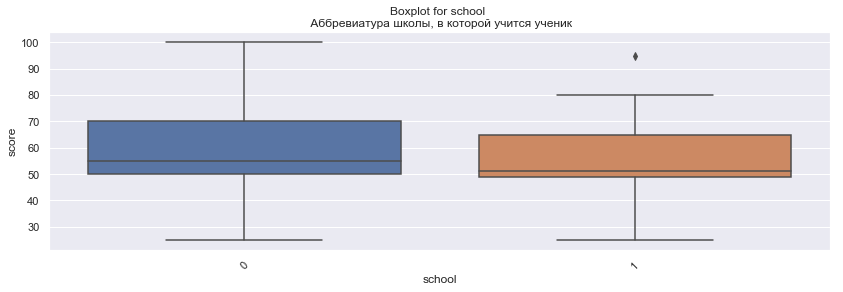

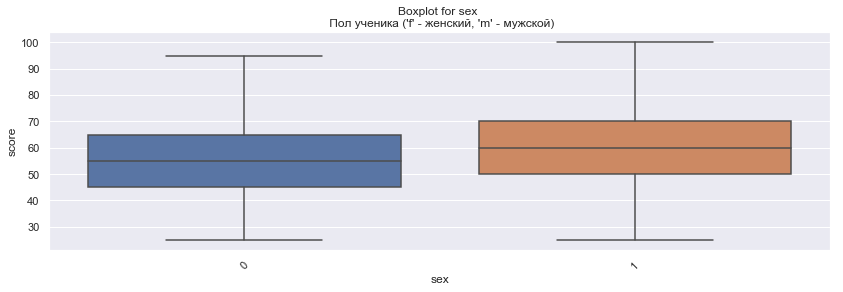

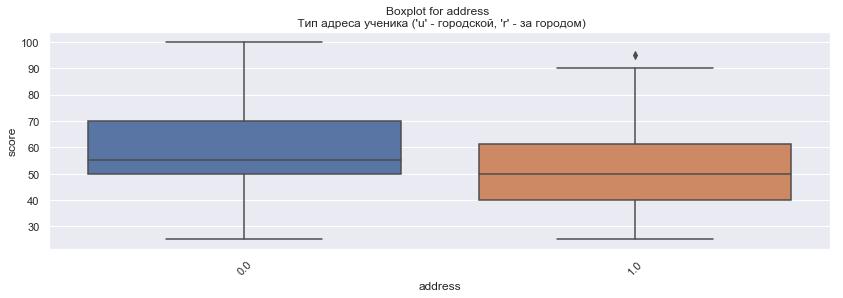

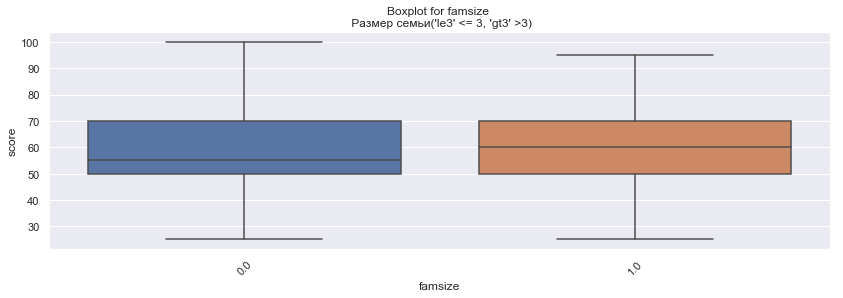

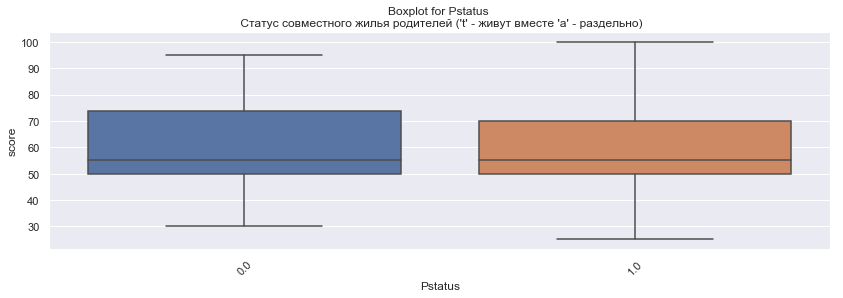

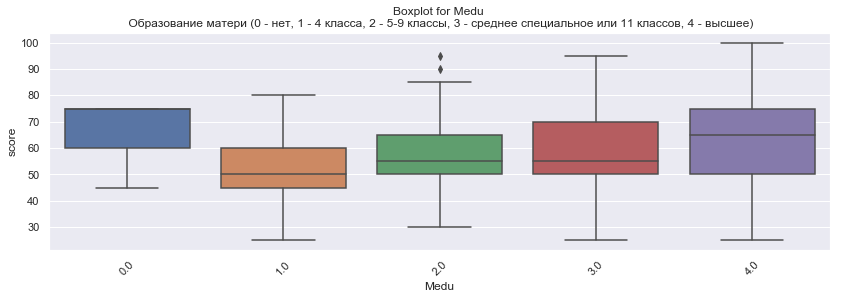

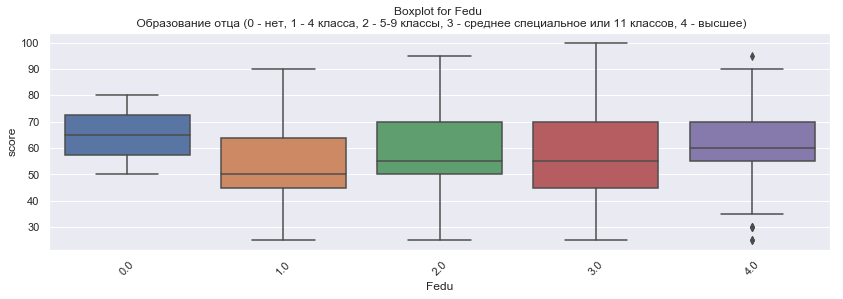

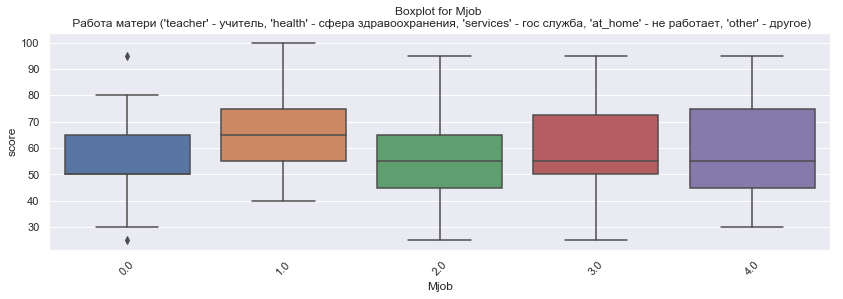

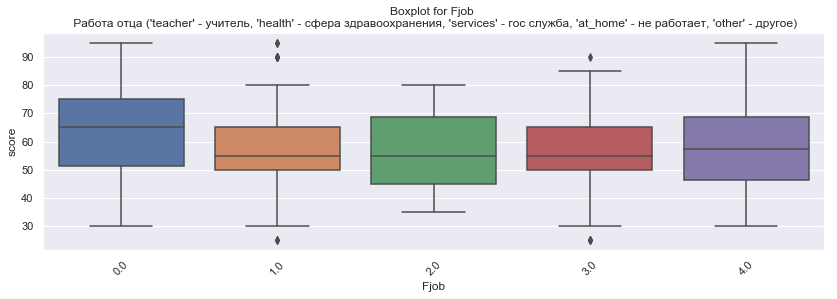

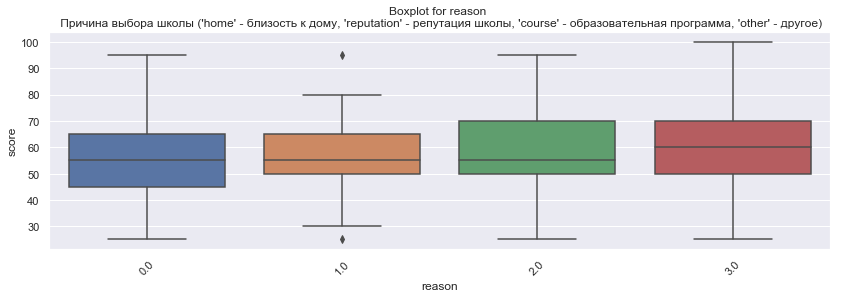

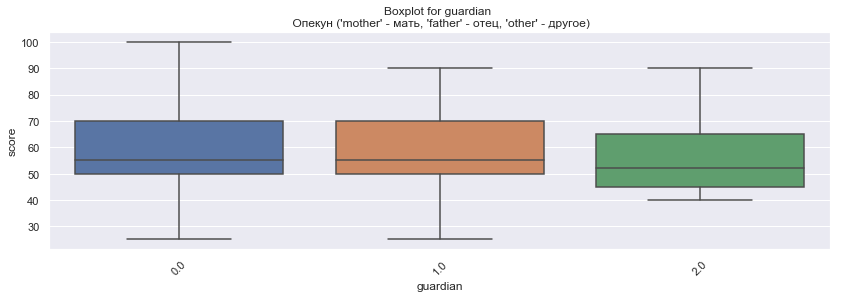

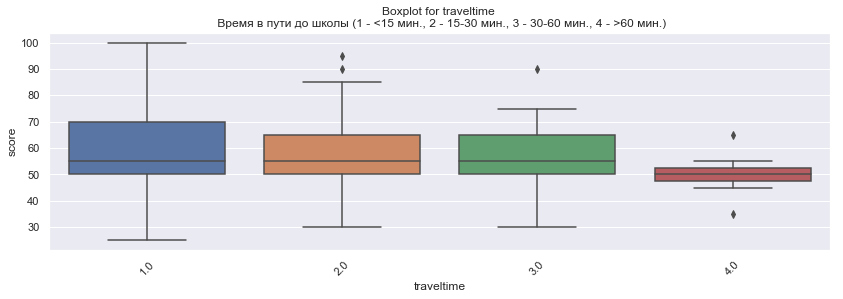

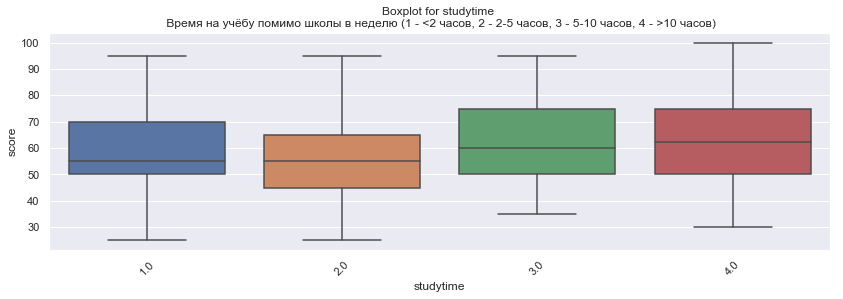

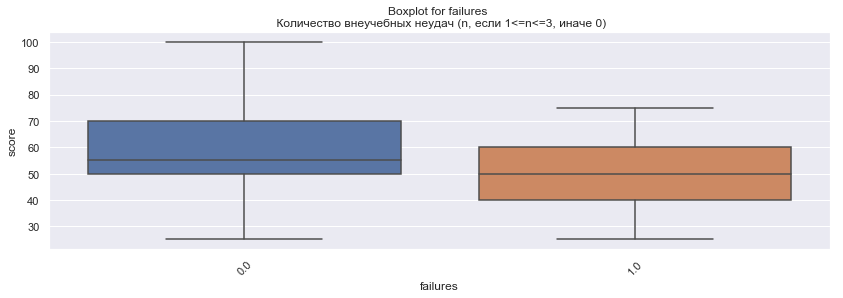

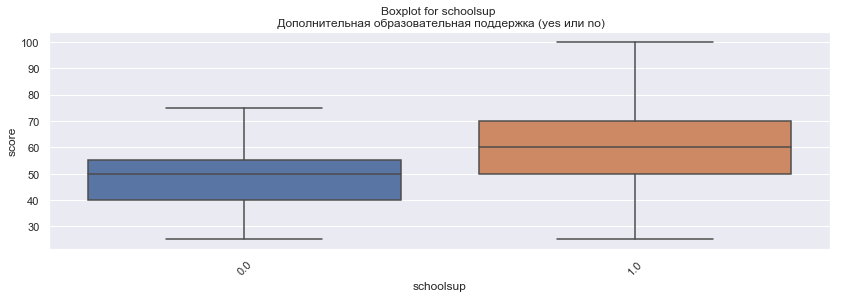

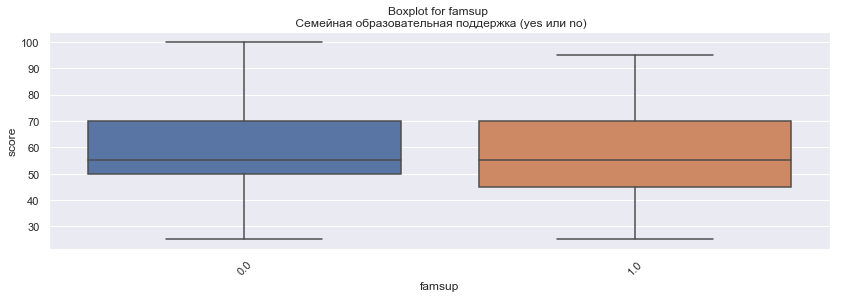

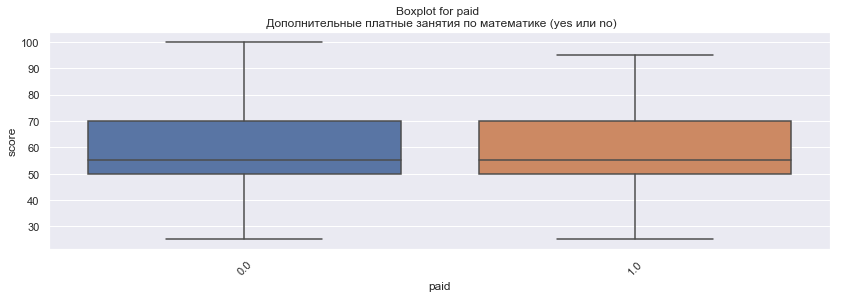

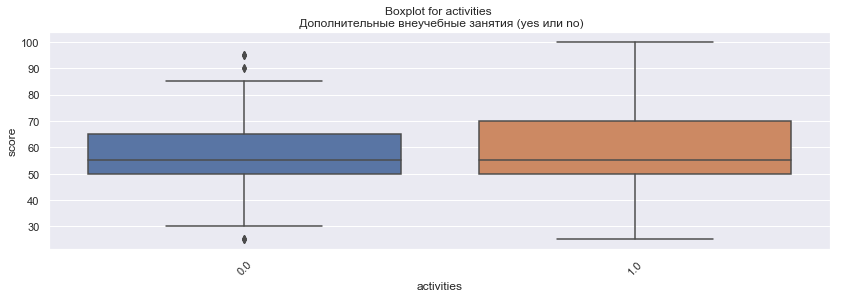

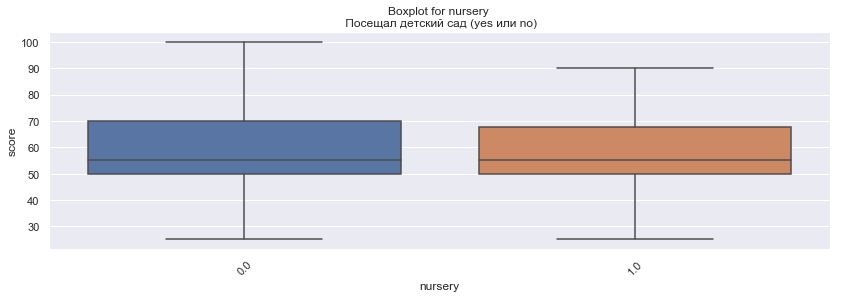

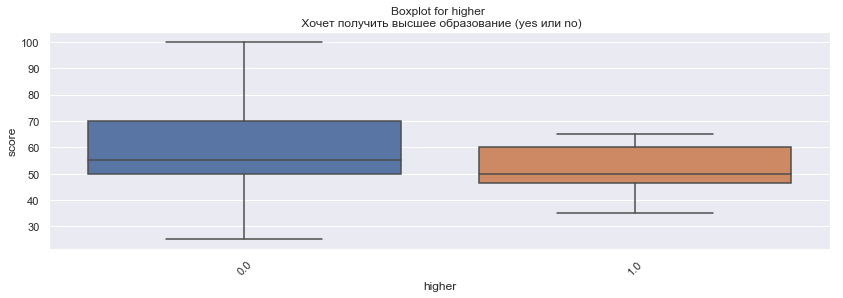

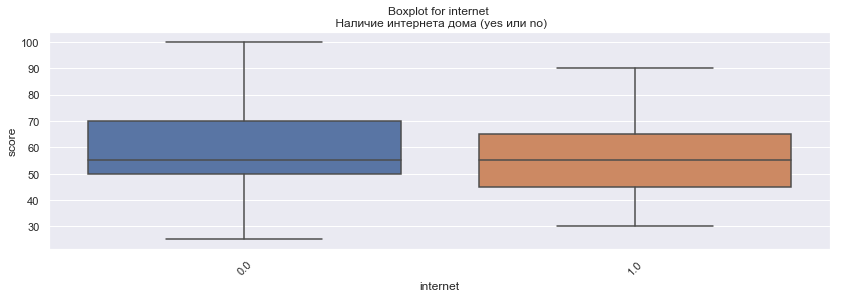

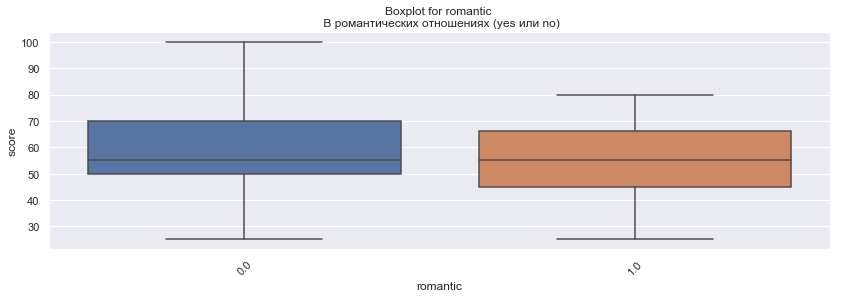

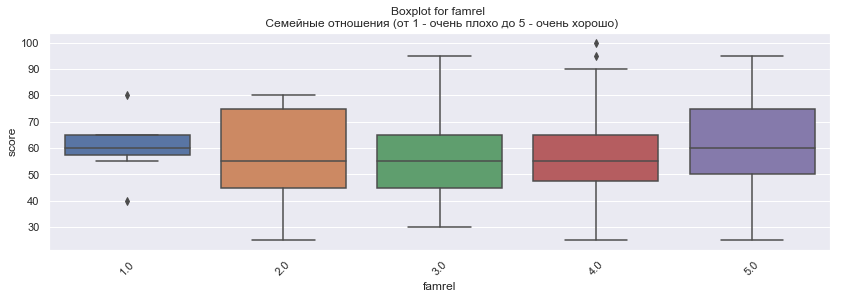

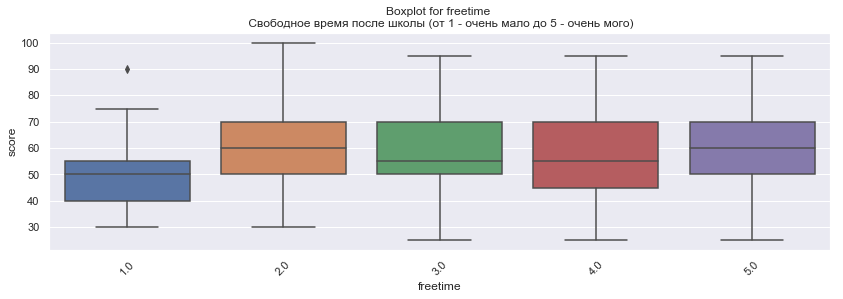

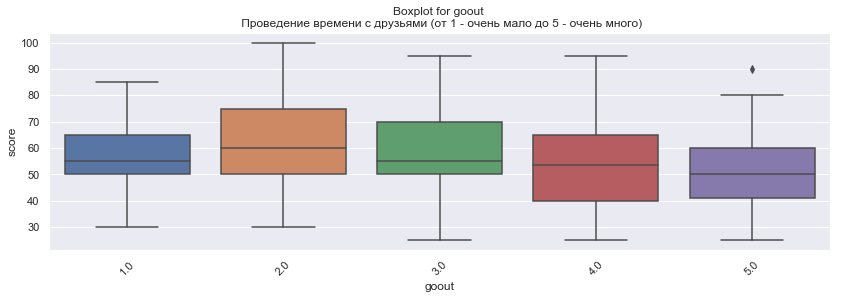

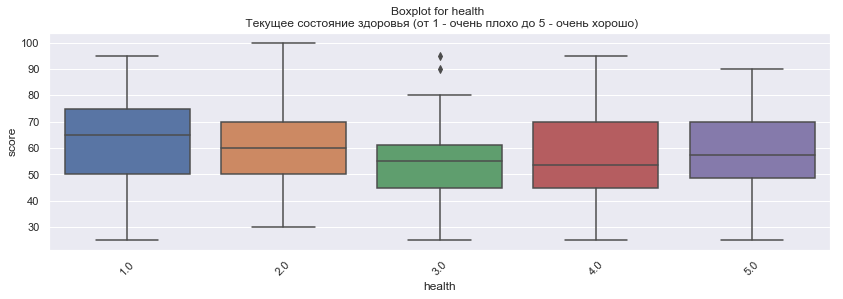

In [23]:
# make boxplot and rate them
all_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout',
       'health']

for column in all_columns:
    display_plot(column, students, 'boxplot')

In [ ]:
# Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента c разными уровнями значимости alpha
alpha = 0.01
print(f'\nуровень значимости alpha равен {alpha}')
for col in all_columns:
    get_stat_dif(data, col, 'score', alpha)

alpha = 0.05
print(f'\nуровень значимости alpha равен {alpha}')
for col in all_columns:
    get_stat_dif(data, col, 'score', alpha)

alpha = 0.1
print(f'\nуровень значимости alpha равен {alpha}')
for col in all_columns:
    get_stat_dif(data, col, 'score', alpha)